# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('product_sales.csv')
df.head()


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


# Data Validation

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [143]:
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [144]:
df.shape

(15000, 8)

In [145]:
df.dtypes

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object

In [146]:
df.duplicated().sum()

0

## There is 1074 null values in the revenue column

In [147]:
df.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

## After checking the columns below, we have a problem in 'sales_method' column by having an extra typo methods when it should only three

In [148]:
print(df['state'].unique())

['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma' 'Massachusetts' 'Missouri' 'Texas' 'New York'
 'Maryland' 'California' 'Tennessee' 'Pennsylvania' 'North Dakota'
 'Florida' 'Michigan' 'North Carolina' 'Hawaii' 'Colorado' 'Louisiana'
 'Virginia' 'New Mexico' 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire'
 'Ohio' 'New Jersey' 'Connecticut' 'Iowa' 'Montana' 'Washington'
 'Kentucky' 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota'
 'South Dakota' 'Delaware' 'Maine' 'Utah' 'West Virginia' 'Vermont'
 'Rhode Island' 'Nevada' 'Idaho' 'Wyoming']


In [149]:
print(df['week'].unique())

[2 6 5 4 3 1]


In [150]:
print(df['nb_sold'].unique())

[10 15 11  9 13  8 12  7 14 16]


In [151]:
print(df['sales_method'].unique())

['Email' 'Email + Call' 'Call' 'em + call' 'email']


## Mapping the 'sale_methods' column into 3 categories only

In [152]:
map = {'Email' : 'Email',
       'Email + Call' : 'Email + Call',
       'Call' : 'Call',
       'em + call' : 'Email + Call',
       'email' : 'Email'  
         }

df['sales_method'] = df['sales_method'].replace(map)

In [153]:
print(df['sales_method'].unique())

['Email' 'Email + Call' 'Call']


In [154]:
df_new = df.dropna(subset=['revenue'])

In [155]:
df_new.shape

(13926, 8)

## Oh no, we have an outlier of 47 and 63 values when it should only 40 years

In [156]:
df_new['years_as_customer'].value_counts().sort_index()

0     1348
1     2336
2     1841
3     1500
4     1232
5     1042
6      856
7      661
8      555
9      476
10     376
11     301
12     267
13     230
14     157
15     144
16     114
17      80
18      76
19      53
20      53
21      36
22      38
23      16
24      24
25      16
26      19
27      14
28       8
29       5
30       9
31       6
32       5
33       8
34       7
35       5
36       4
37       2
38       2
39       2
47       1
63       1
Name: years_as_customer, dtype: int64

## Dropping outliers in years_as_customer

In [157]:
df_new.drop(df[df['years_as_customer'] > 40].index, axis=0, inplace=True)

In [158]:
df_new['years_as_customer'].value_counts().sort_index()

0     1348
1     2336
2     1841
3     1500
4     1232
5     1042
6      856
7      661
8      555
9      476
10     376
11     301
12     267
13     230
14     157
15     144
16     114
17      80
18      76
19      53
20      53
21      36
22      38
23      16
24      24
25      16
26      19
27      14
28       8
29       5
30       9
31       6
32       5
33       8
34       7
35       5
36       4
37       2
38       2
39       2
Name: years_as_customer, dtype: int64

In [159]:
df_new['state'].value_counts()

California        1737
Texas             1109
New York           899
Florida            826
Illinois           576
Pennsylvania       553
Ohio               520
Michigan           466
Georgia            460
North Carolina     430
New Jersey         402
Virginia           346
Indiana            327
Washington         309
Tennessee          308
Arizona            295
Missouri           286
Massachusetts      270
Maryland           245
Wisconsin          235
Minnesota          228
Oregon             214
Louisiana          213
South Carolina     213
Colorado           212
Alabama            202
Kentucky           202
Oklahoma           184
Connecticut        167
Iowa               154
Mississippi        133
Kansas             129
Arkansas           118
Utah               115
Nevada              97
Nebraska            86
New Mexico          79
West Virginia       77
Hawaii              67
Maine               60
Idaho               59
New Hampshire       48
Montana             43
Rhode Islan

In [160]:
(df_new['state'].unique())

array(['Kansas', 'Wisconsin', 'Illinois', 'Mississippi', 'Georgia',
       'Oklahoma', 'Massachusetts', 'Missouri', 'Texas', 'New York',
       'Maryland', 'California', 'Tennessee', 'North Dakota', 'Florida',
       'Michigan', 'North Carolina', 'Pennsylvania', 'Indiana', 'Hawaii',
       'Colorado', 'Louisiana', 'Virginia', 'Arkansas', 'Alaska',
       'Oregon', 'New Hampshire', 'Ohio', 'New Jersey', 'Connecticut',
       'Iowa', 'Montana', 'Washington', 'Arizona', 'Kentucky', 'Alabama',
       'Nebraska', 'South Carolina', 'Minnesota', 'South Dakota', 'Maine',
       'Utah', 'West Virginia', 'Vermont', 'New Mexico', 'Rhode Island',
       'Nevada', 'Delaware', 'Idaho', 'Wyoming'], dtype=object)

In [161]:
df_new['nb_sold'].value_counts().sort_index()

7      681
8     1838
9     3316
10    3422
11    2276
12     961
13     846
14      93
15     461
16      30
Name: nb_sold, dtype: int64

In [162]:
df_new.shape

(13924, 8)

# Summary of Data Validation and Cleaning

The dataset has 15,000 and 8 columns then now 13,924 and 8 columns of validating and cleaning the dataset. The following below are the validation and cleanse of dataset table documentation

1. week - has 6 unique values with 1 - 6 values, no cleaning needed.
2. sales_method - 3 methods are assign but there an extra methods but they type error like 'email' and 'em + call'. I map them into 3 categories.
3. customer_id - all unique and no null values so no cleaning needed.
4. nb_sold - no cleaning needed
5. years_as_customer - only 2 outliers are spotted(47 and 67) so I drop them.
6. nb_site_visits - no cleaning needed.
7. state - only 50 values, no nulls neither duplicates so no cleaning needed

# Exploratory Analysis

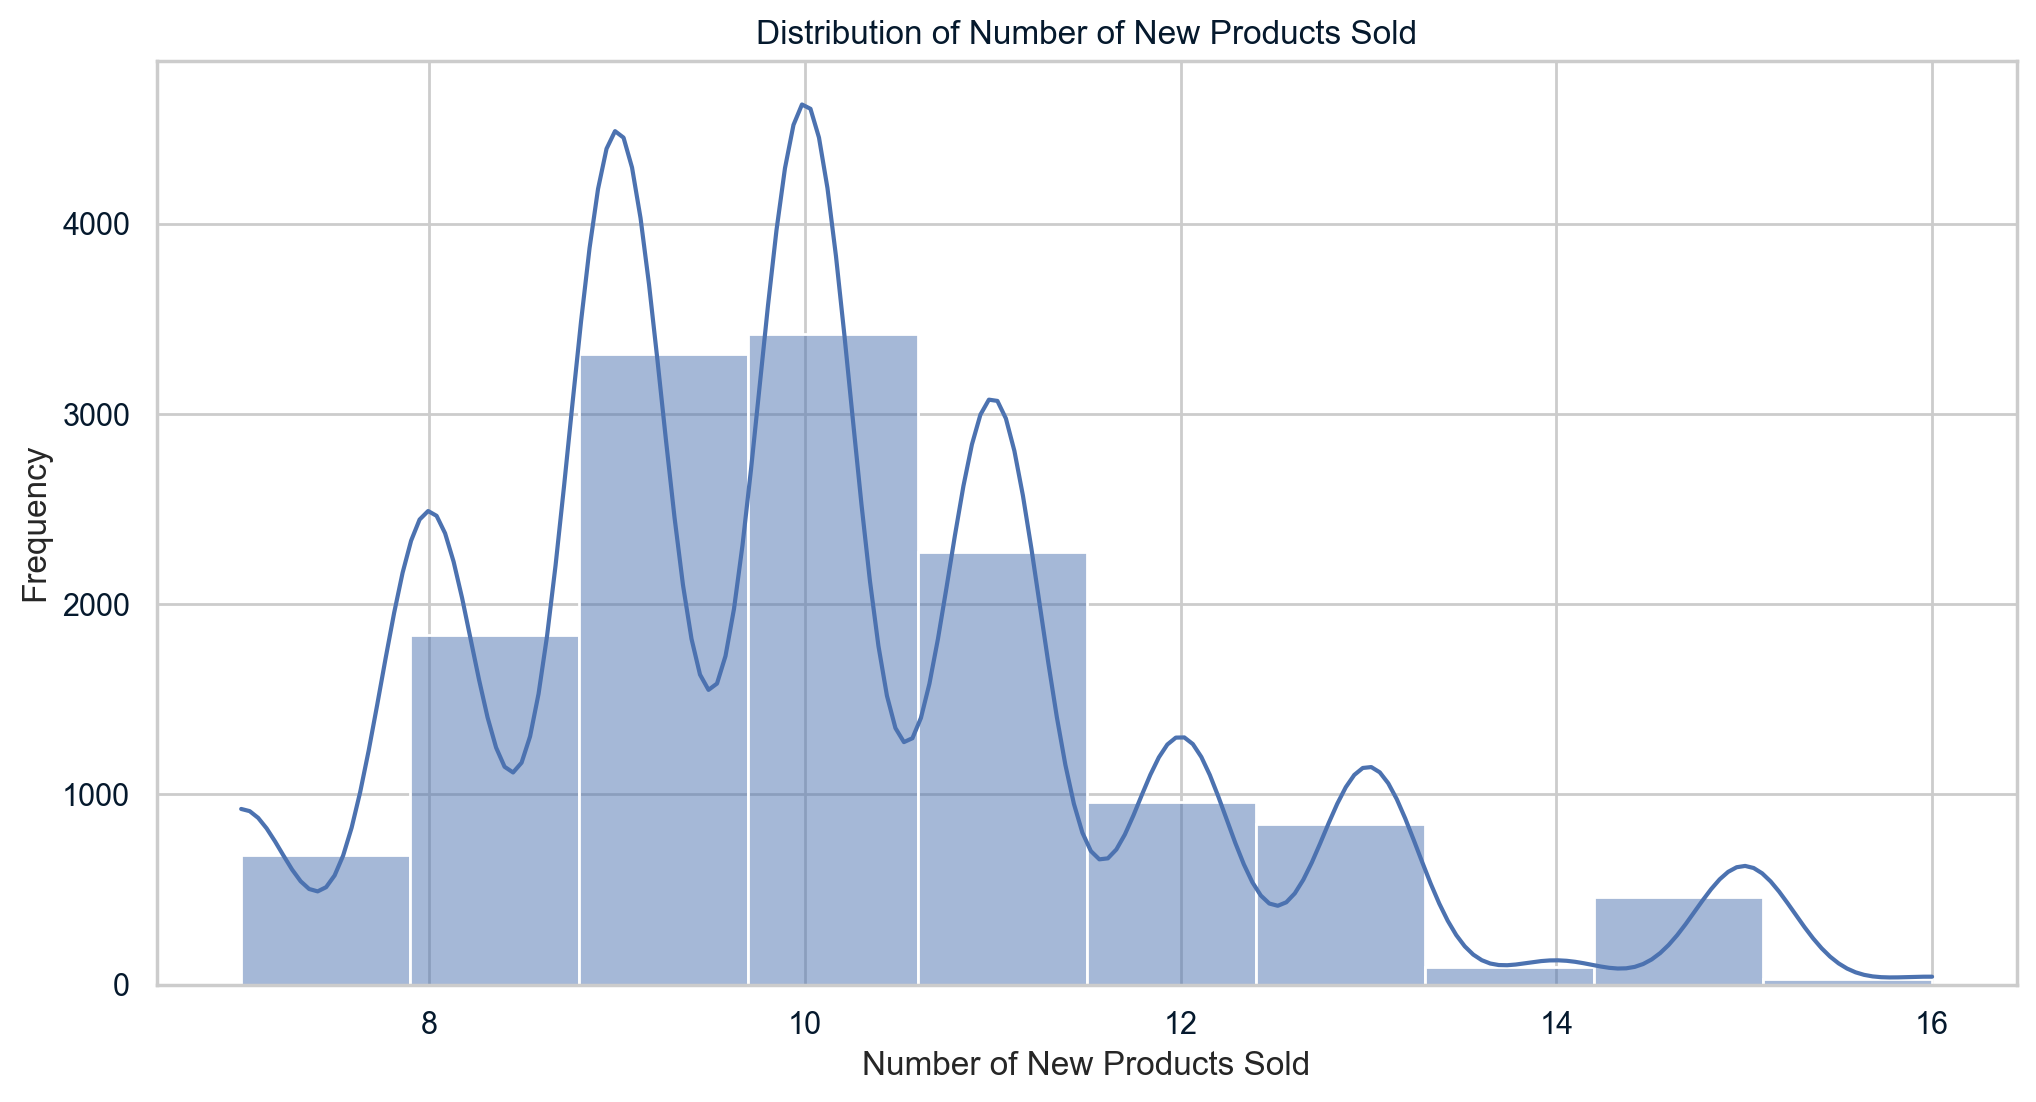

In [163]:
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.histplot(data=df_new, x='nb_sold', kde=True, bins=10)
plt.title('Distribution of Number of New Products Sold')
plt.xlabel('Number of New Products Sold')
plt.ylabel('Frequency')
plt.show()

About 3500 customers made purchase to 9 or 10 products. Overall, the distribution is normal distribution but with a positive skew

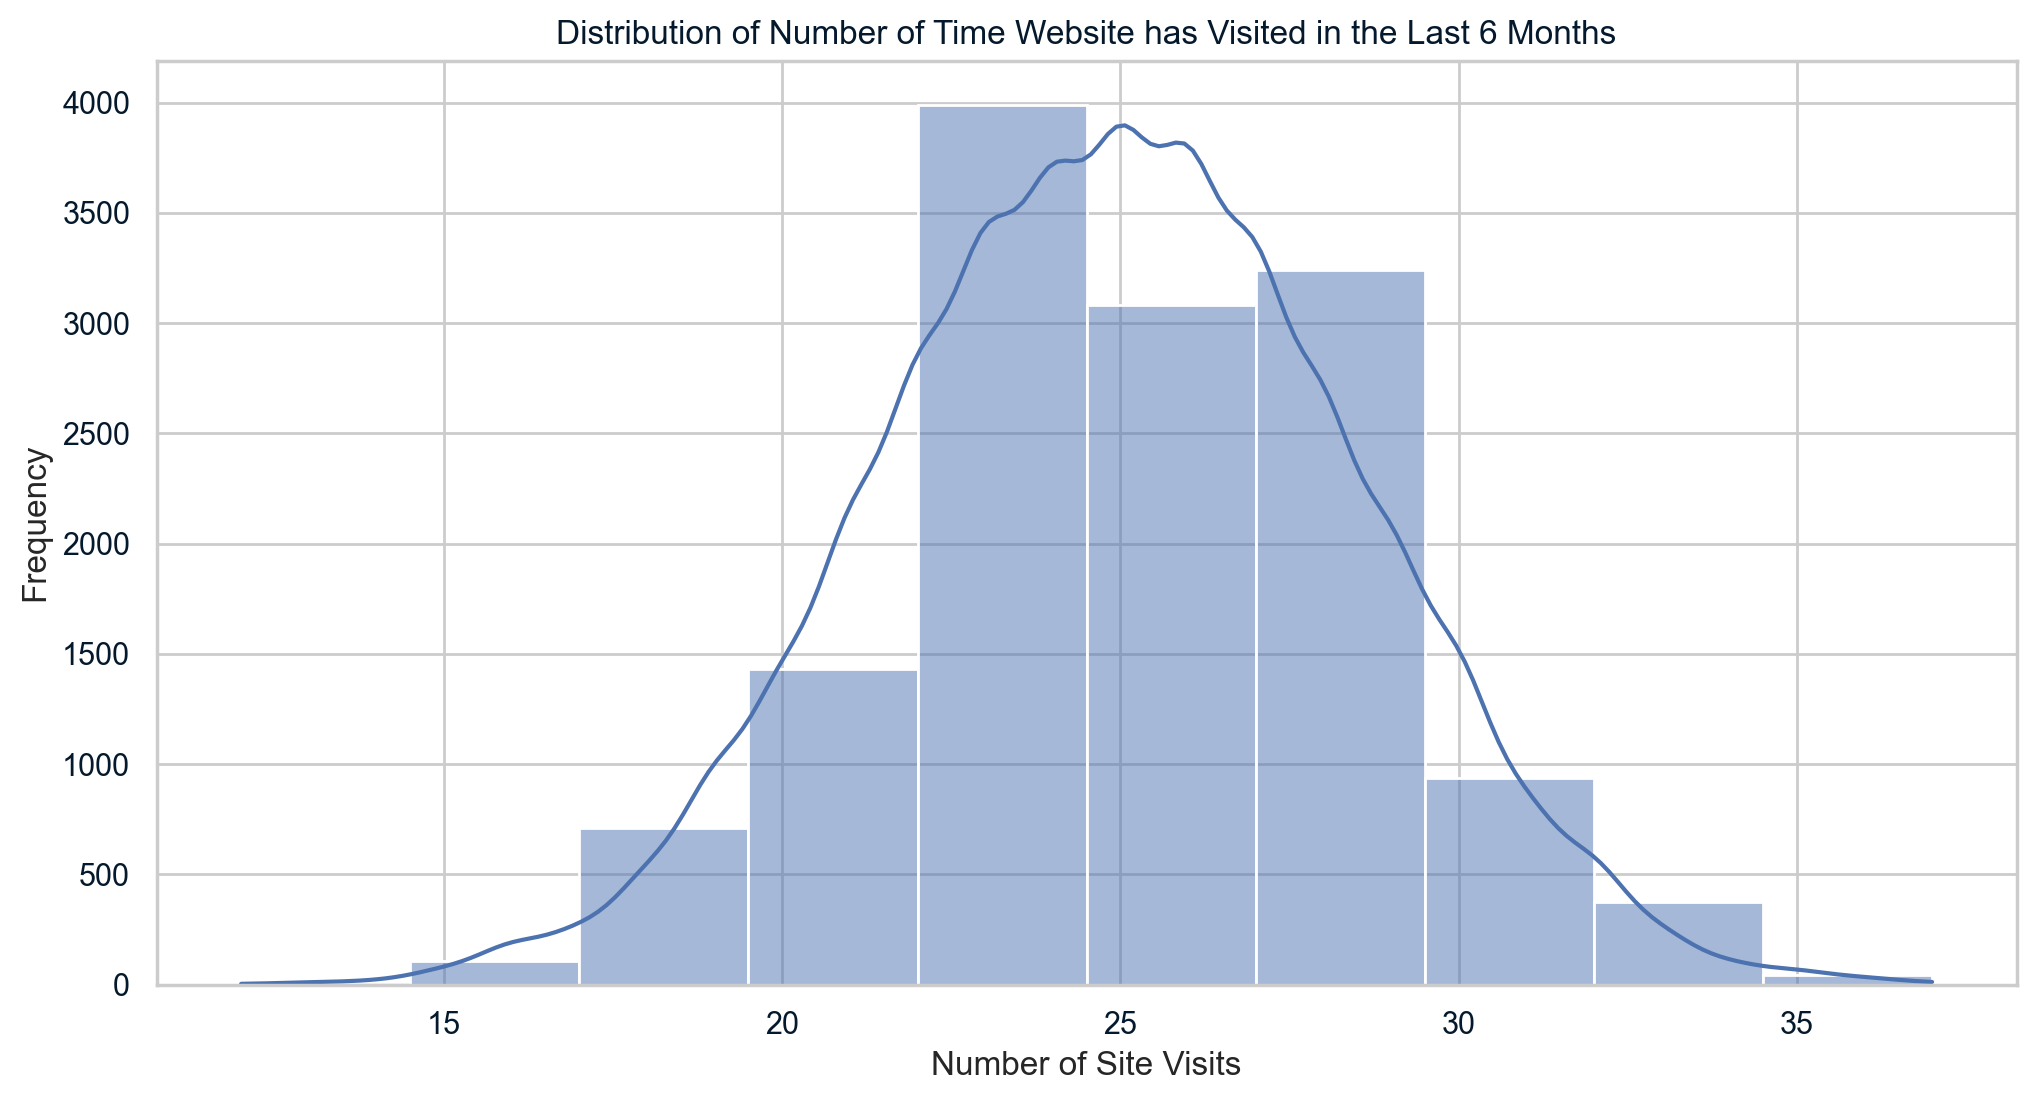

In [164]:
sns.set(style='whitegrid')

plt.figure(figsize=(12, 6))
sns.histplot(data=df_new, x='nb_site_visits', kde=True, bins=10)
plt.title('Distribution of Number of Time Website has Visited in the Last 6 Months')
plt.xlabel('Number of Site Visits')
plt.ylabel('Frequency')
plt.show()

With an average of 25 visits per customer over the past six months, the visitation pattern is almost resembles the normal distribution. The distribution data indicates that 3000 to 4000 customers visited the site between 24 and 26 times during the same six month period

# 1. How many customers were there for each approach?

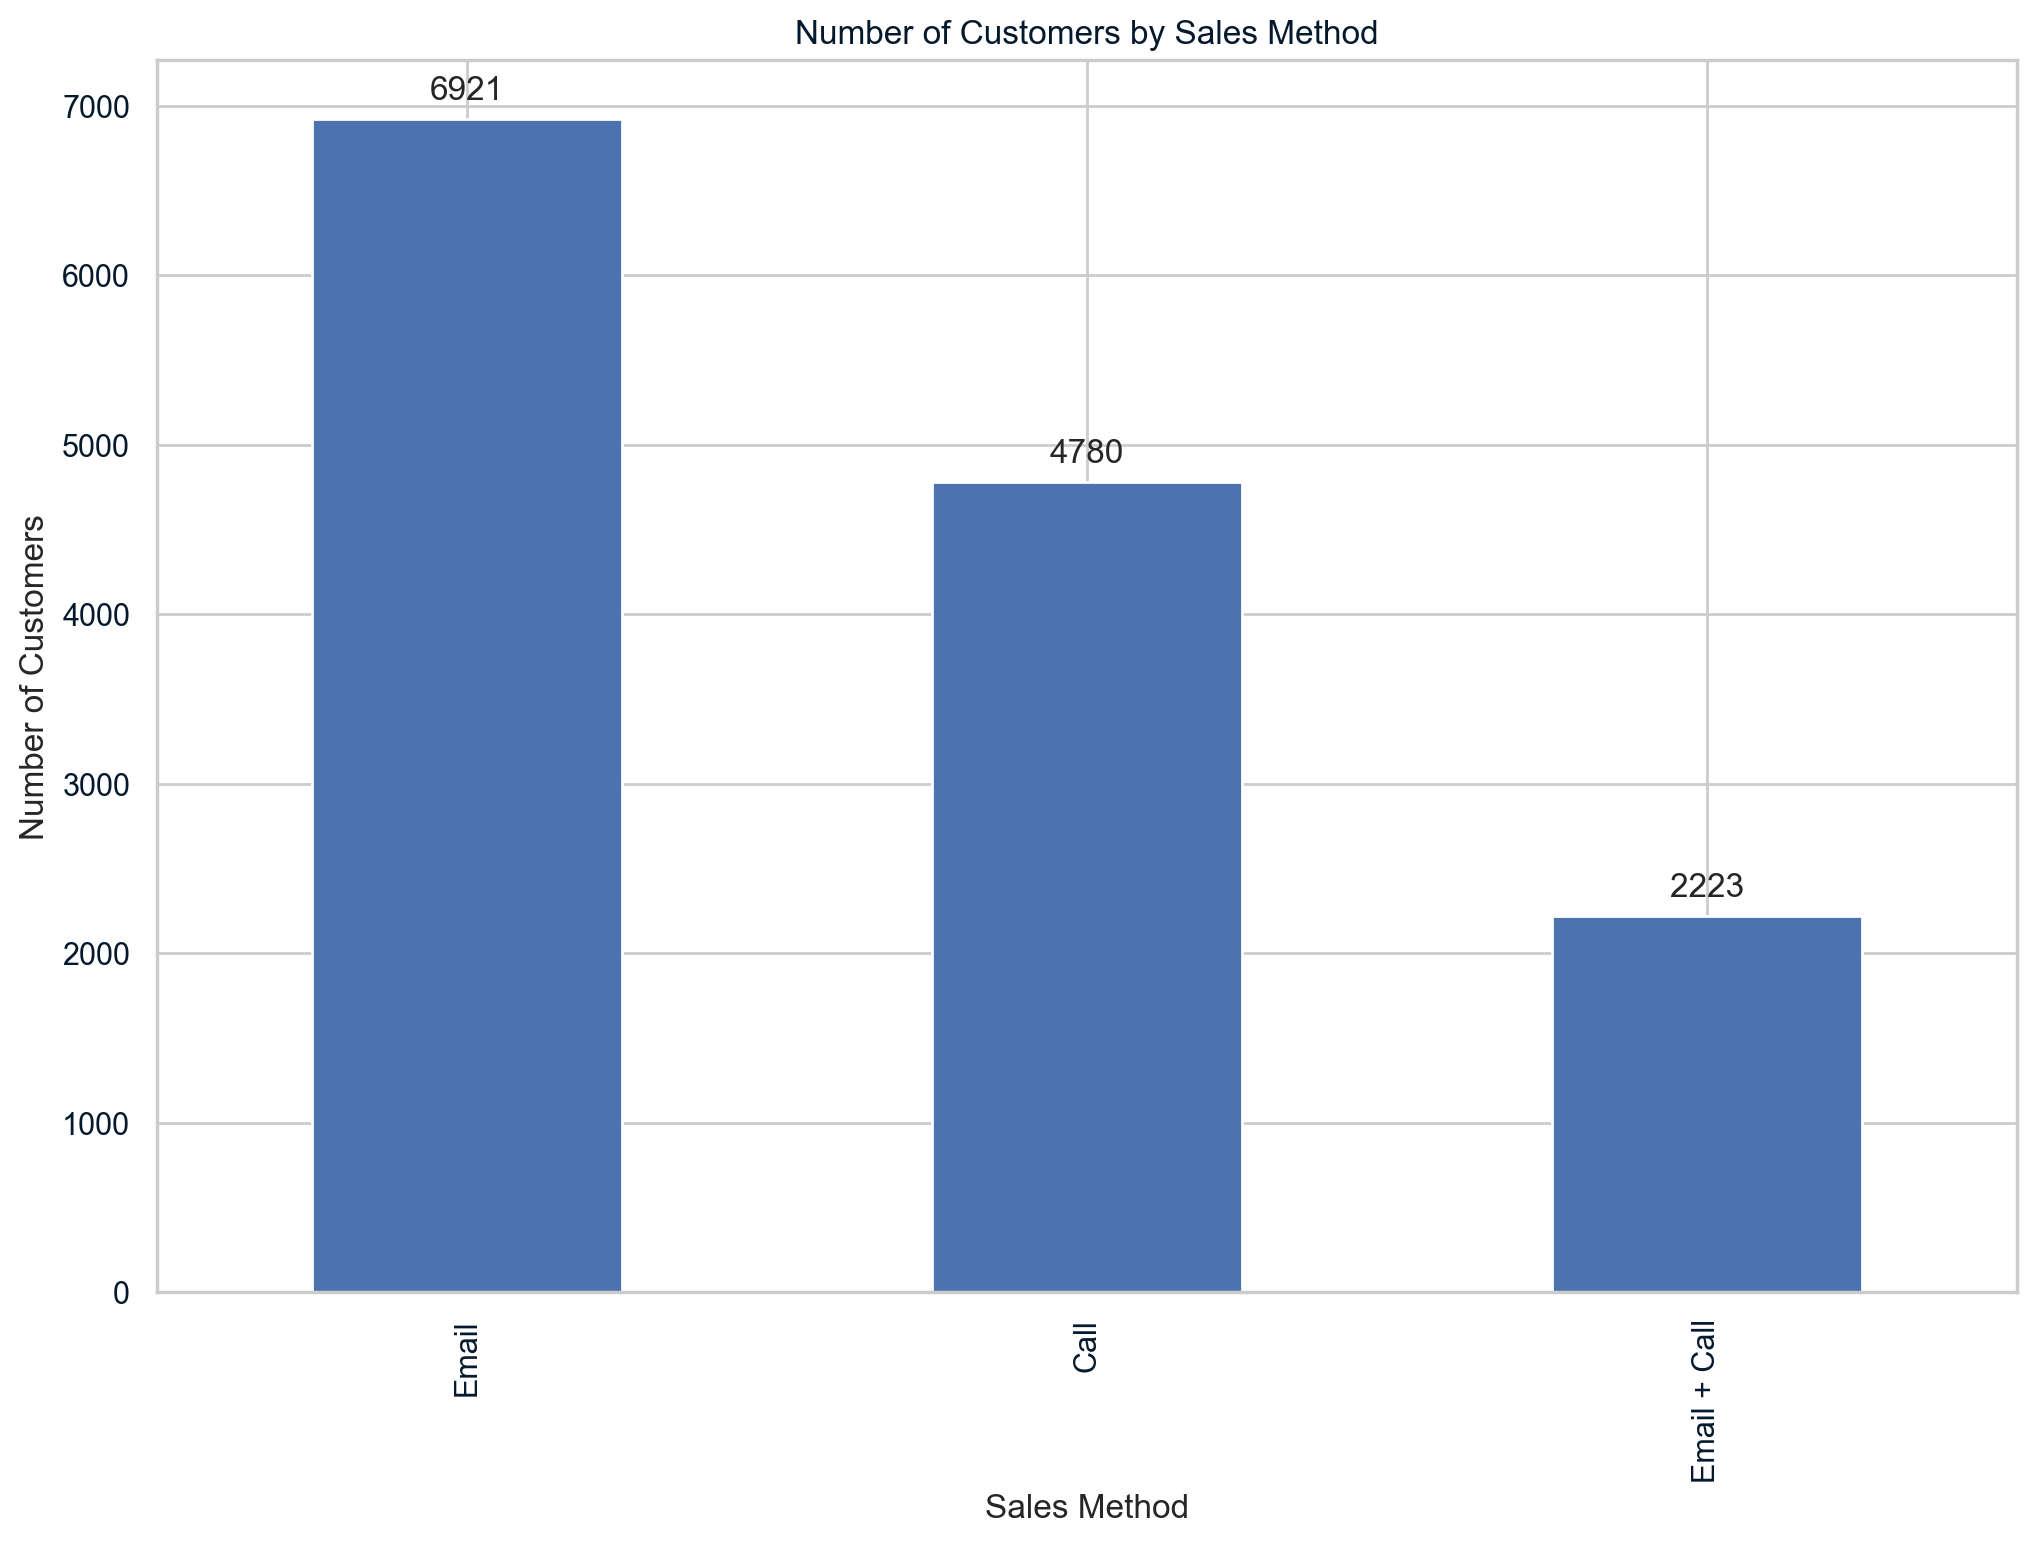

In [165]:
# Displaying each method customer numbers

plt.figure(figsize=(12, 8))

ax = df_new.sales_method.value_counts().plot(kind='bar', title='Number of Customers by Sales Method')
ax.set_xlabel('Sales Method')
ax.set_ylabel('Number of Customers')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

The bar chart shows that the Email method was the most successful method having 6,921 sales. Next was the Call method having 4780 sales and the last is Email + Call method having 2,223 sales. 51.4% of the total sales dominated by Email method.

# 2. What does the spread of revenue look like overall? and for each method?

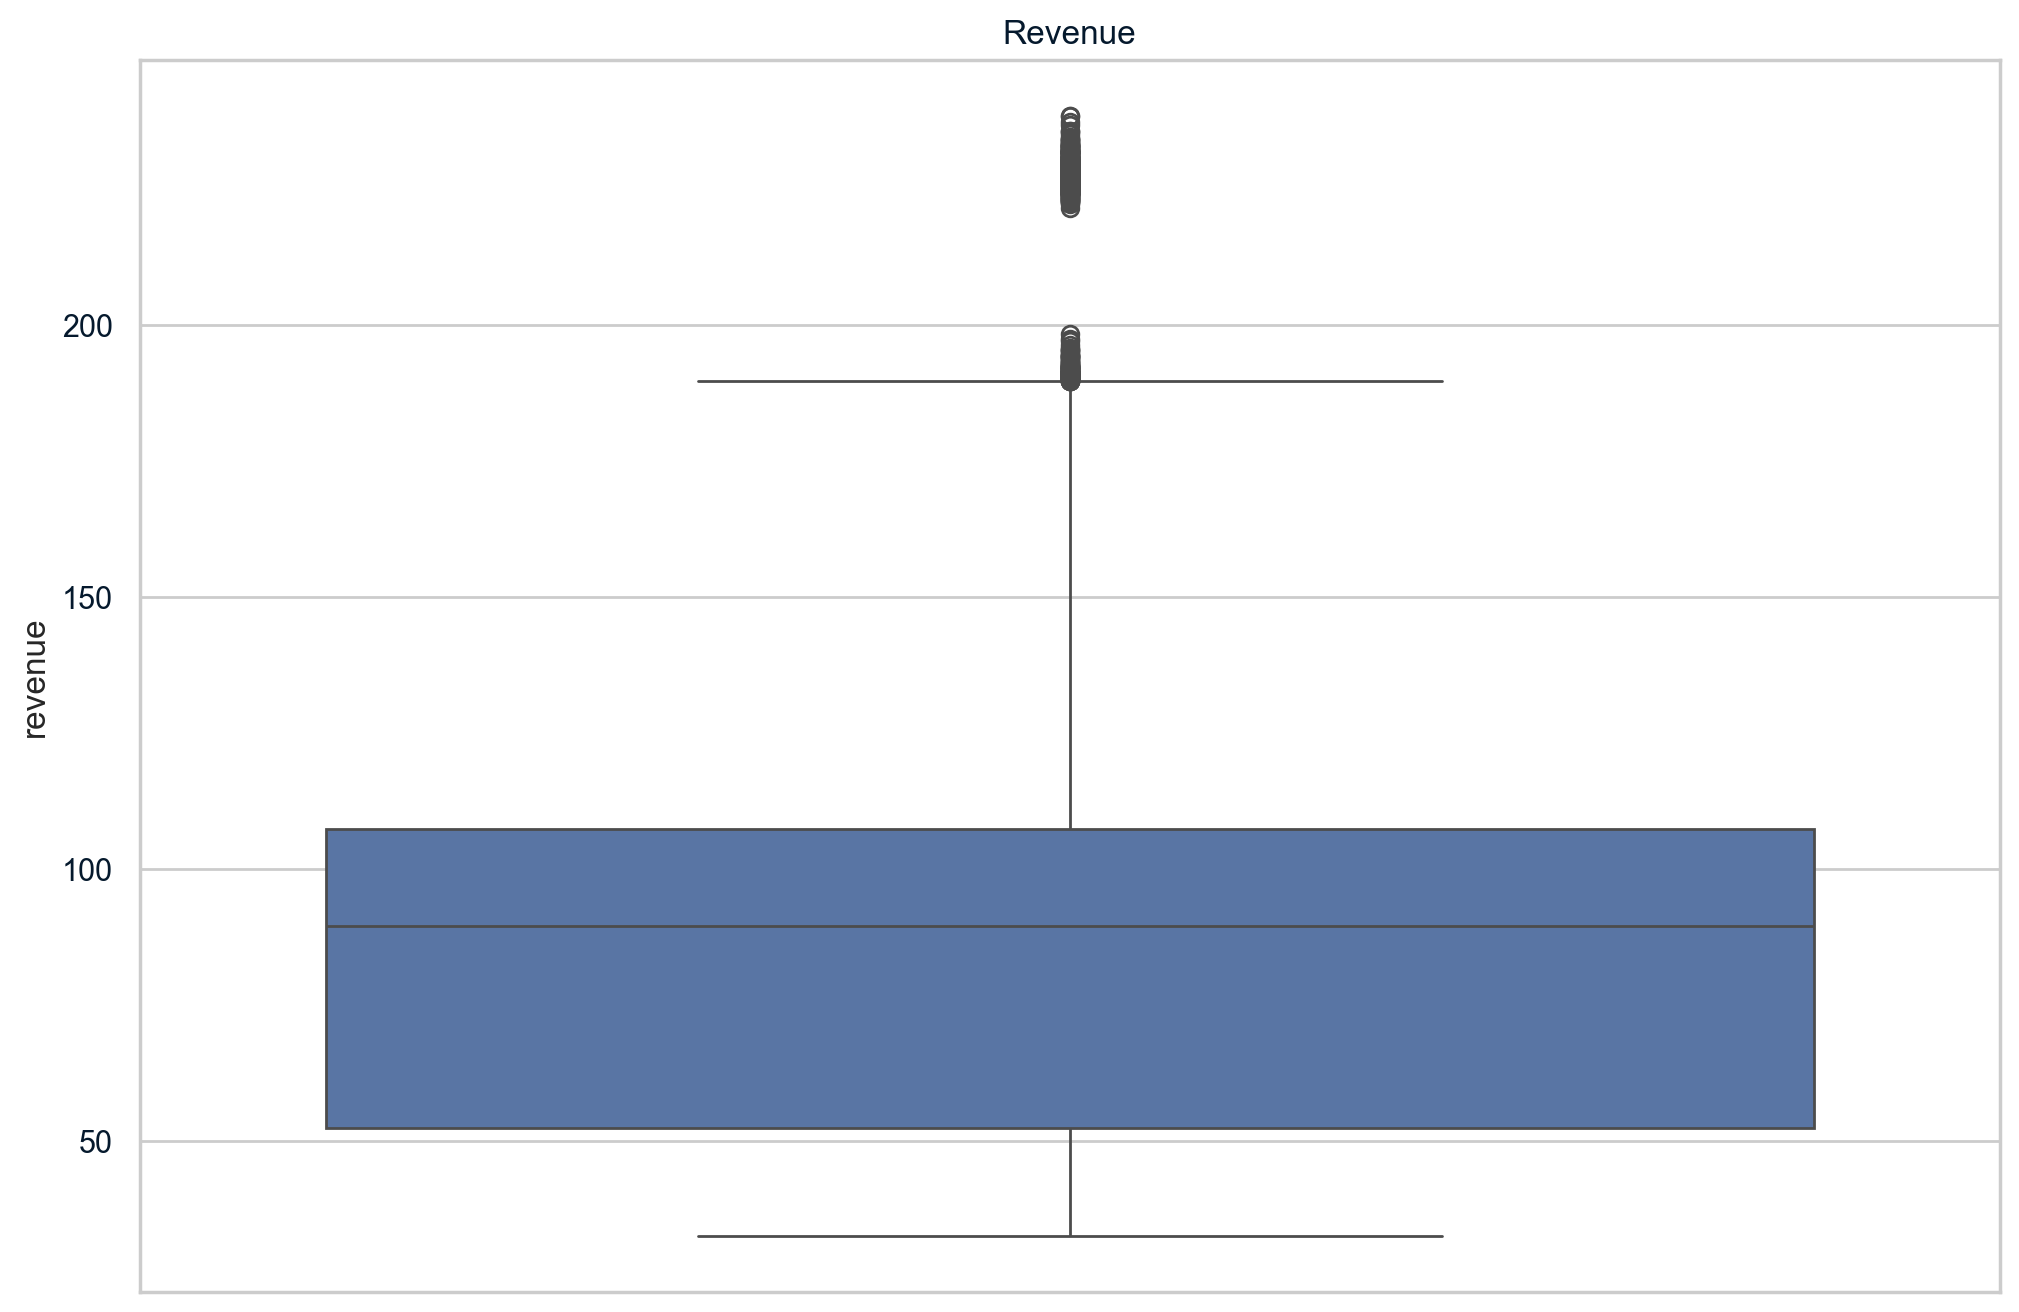

In [166]:
plt.figure(figsize=(12, 8))
sns.boxplot(y=df_new['revenue']).set_title('Revenue')
plt.show()



The boxplot displaying the distribution of revenue shows that the median value is almost 90. The interquartile range are between 50 and 100. Additionally, 190 higher are considered outliers.

In [167]:
#Display plot of Total Revenue by Sales Method
def display_plot(kind, data, x_arg, y_arg, hue, title, x_label, y_label, color, marker_=None):
    plt.figure(figsize=(8, 6))
    ax = kind(data=data, x=x_arg, y=y_arg, hue=hue, color=color)
    set_plot_labels(title, x_label, y_label)

    if kind == sns.barplot:
        annotate_bars(ax)

    plt.show()

def annotate_bars(ax):
    total = sum(p.get_height() for p in ax.patches)
    for p in ax.patches:
        annotation = '{:.1f}%'.format((p.get_height() / total) * 100)
        ax.annotate(annotation, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', size='12')

def set_plot_labels(title, x_label, y_label):
    plt.title(title, size=15, weight='bold')
    plt.xlabel(x_label, size=13, weight='bold')
    plt.ylabel(y_label, size=13, weight='bold')

In [168]:
revenue_by_method = df_new.groupby('sales_method')['revenue'].sum().reset_index().sort_values(by='revenue', ascending=False)

print(f"Revenue by method:\n{revenue_by_method}")

Revenue by method:
   sales_method    revenue
1         Email  672220.61
2  Email + Call  408256.69
0          Call  227513.02


***The spread of the revenue for each method in percentage***

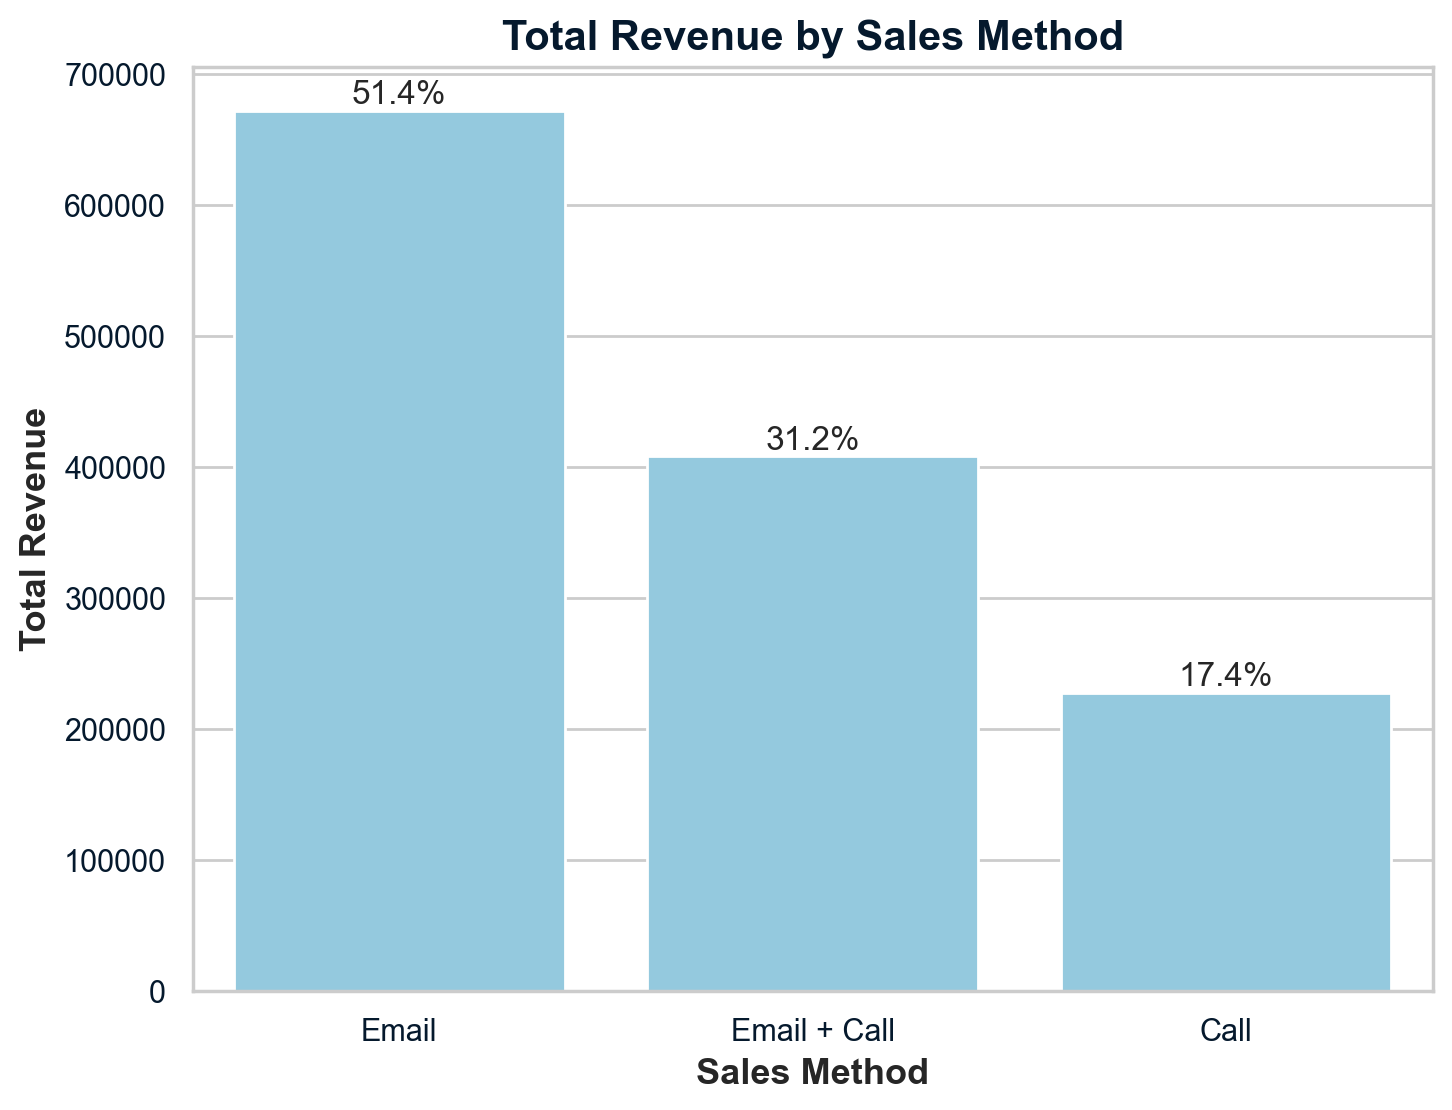

In [169]:
display_plot(sns.barplot, revenue_by_method, 'sales_method', 'revenue', None, 'Total Revenue by Sales Method', 'Sales Method', 'Total Revenue', 'skyblue')

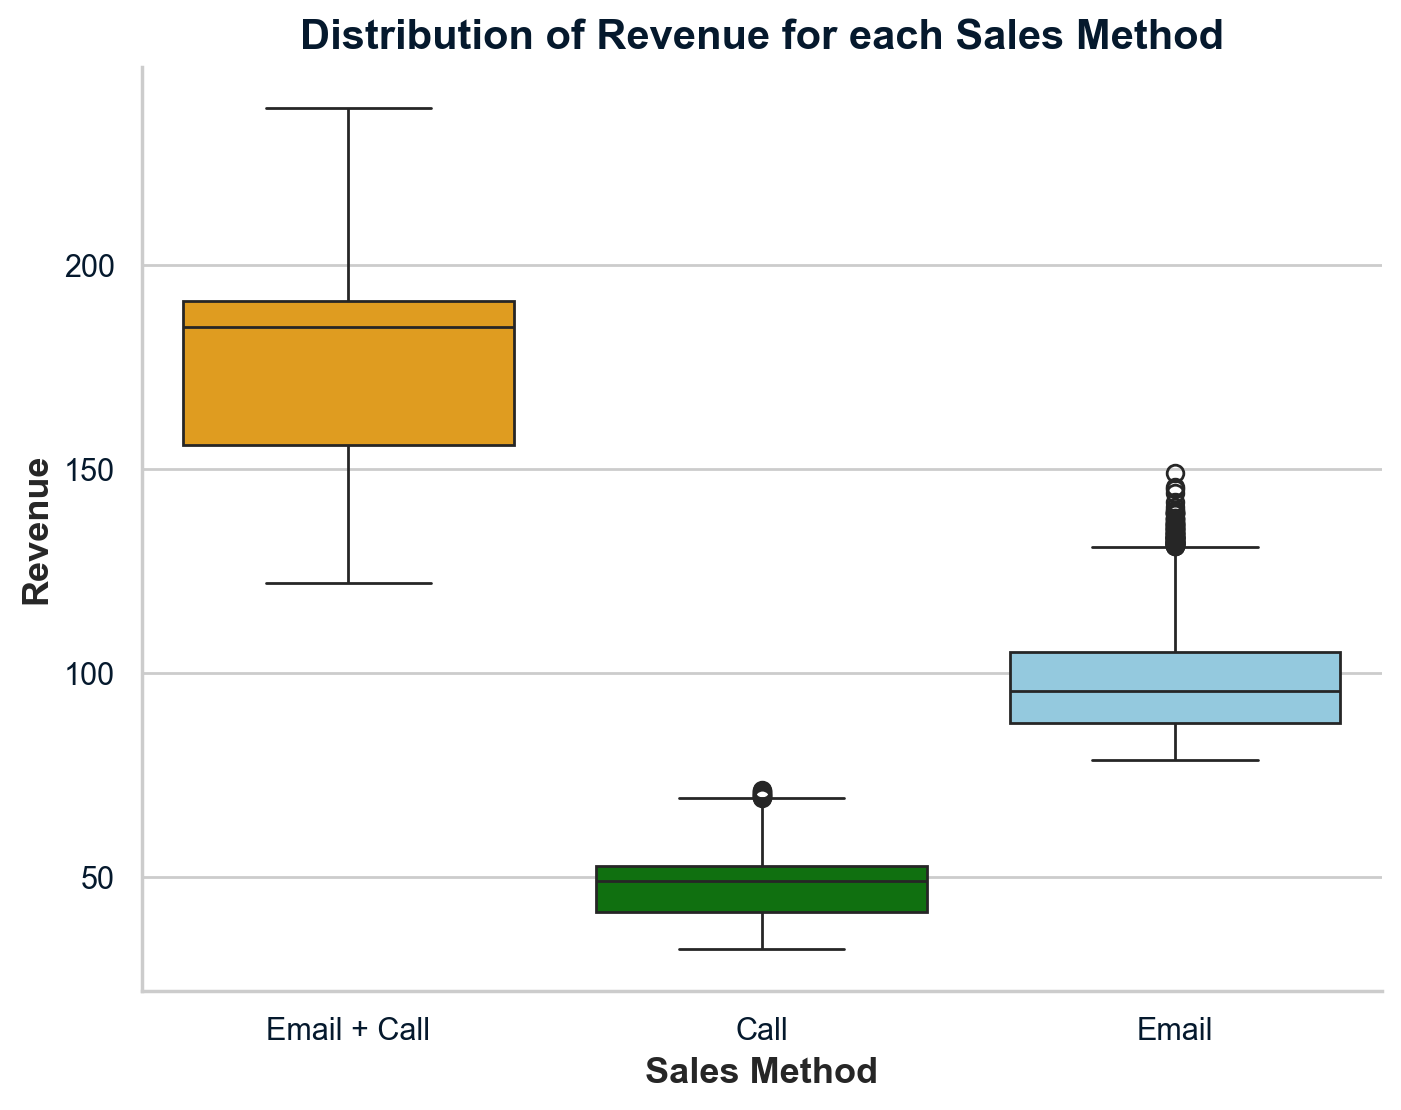

In [170]:
#Boxplot
def display_boxplot(data, x_arg, y_arg, title, x_label, y_label, palette):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.boxplot(data=data, x=x_arg, y=y_arg, hue=x_arg, palette=palette, ax=ax, legend=False)
    
    ax.set_title(title, fontsize=15, fontweight='bold')
    ax.set_xlabel(x_label, fontsize=13, fontweight='bold')
    ax.set_ylabel(y_label, fontsize=13, fontweight='bold')
    
    sns.despine()
    plt.show()
    
#Boxplot to Display the Spread of Revenue for Each Sales Method
display_boxplot(data=df_new, x_arg='sales_method', y_arg='revenue', title='Distribution of Revenue for each Sales Method', x_label='Sales Method', y_label='Revenue', palette = ['orange', 'green', 'skyblue'])

When examining the revenue distribution by sales method, distinct differences emerge in their medians and overall spread. The **Email + Call** method is notable for its broad spread and higher median, approximately 190.00. Conversely, the **Call** method features a more limited spread and a lower median, roughly 50.00. Positioned between these is the **Email** method, which displays a narrow spread similar to the Call method but boasts a higher median, close to 90.00.

# 3. Was there any difference in revenue over time for each of the methods?

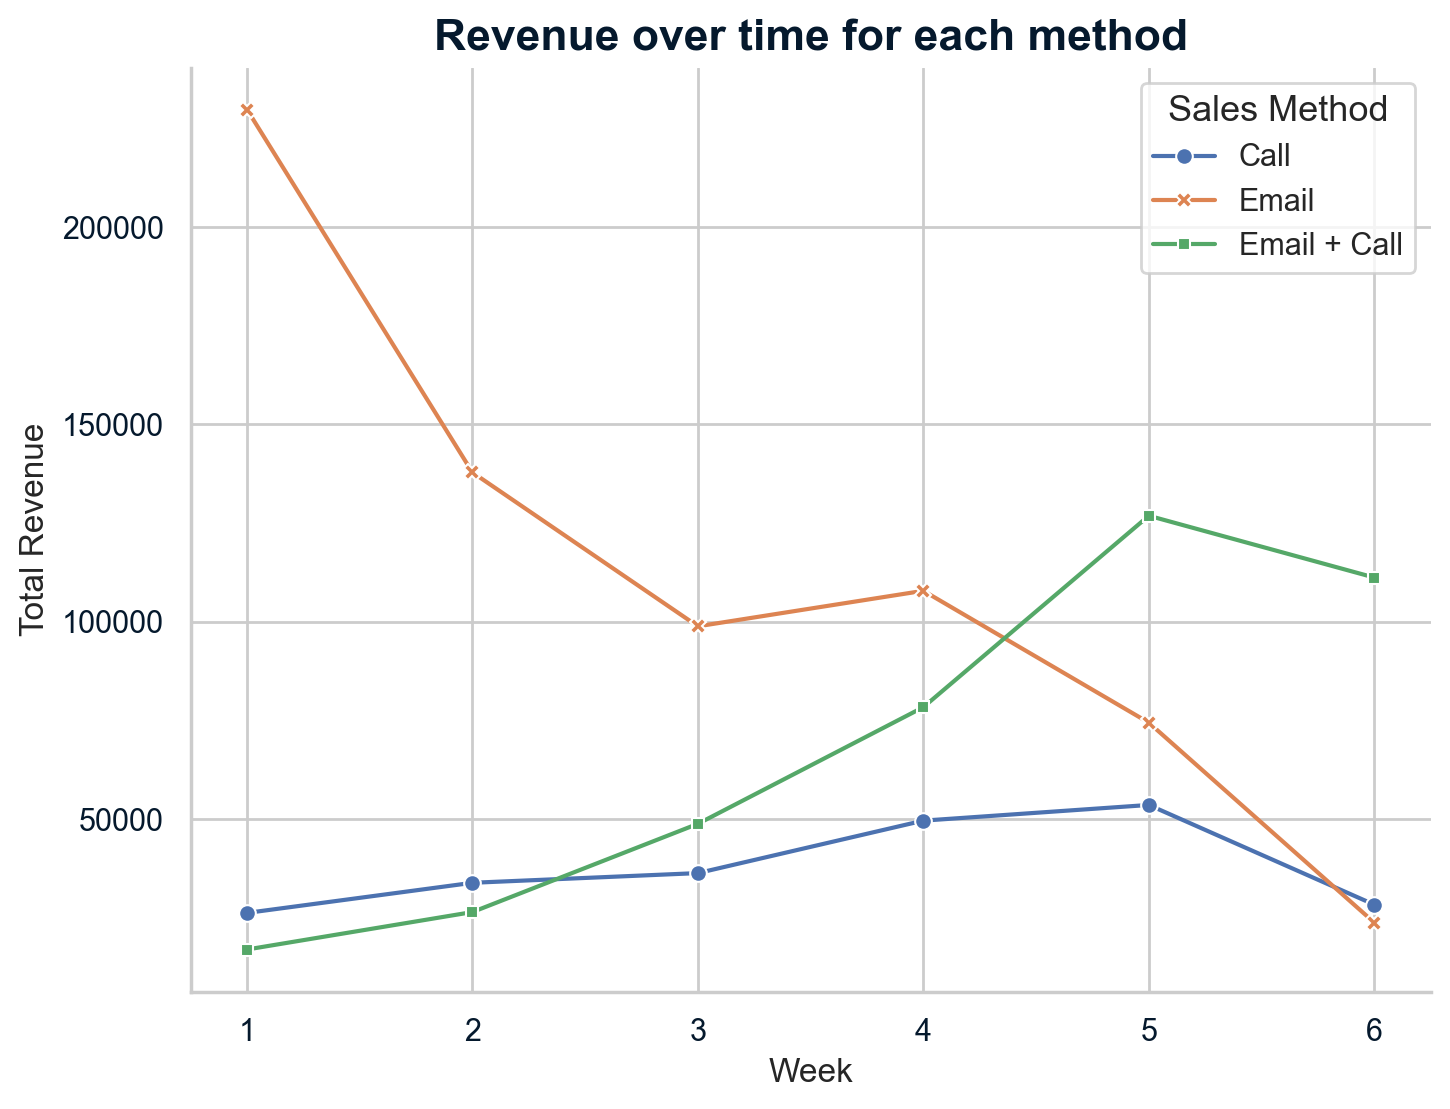

In [171]:

# Grouping the data by week and sales method, and summing the revenue
sum_revenue = df_new.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()

# Creating the line plot with dots
plt.figure(figsize=(8, 6))
sns.lineplot(data=sum_revenue, x="week", y="revenue", hue="sales_method", markers=True, style="sales_method", dashes=False)
plt.title('Revenue over time for each method', fontdict={'size': 16, 'weight': 'bold'})
plt.xlabel("Week", fontsize=12)
plt.ylabel("Total Revenue", fontsize=12)
plt.legend(title="Sales Method", title_fontsize='13', fontsize='11')

sns.despine()  
plt.show()


Base on the line plot, the Email method was the highest revenue, Starting Week 1 at its peak approximately 230,000 but it has significantly declining as week goes by. By Week 3 the Email method has drop over 58%. In contrast, the **Email + Call** method, although starting at a lower revenue point than the Email-only approach, surpassed all others by the end of the period, taking the lead in revenue generation. This trend suggests that the **Email + Call** method is the most effective, and we would recommend prioritizing this approach moving forward. It consistently showed upward momentum, reaching its peak in Week 6, and it's likely it would have continued to perform well if observed for a longer duration. Conversely, the **Call-only** approach showed minimal fluctuation, starting and ending with low revenue, **indicating that strategies focusing solely on Email or combining Email and Calls might be more effective in engaging customers.**

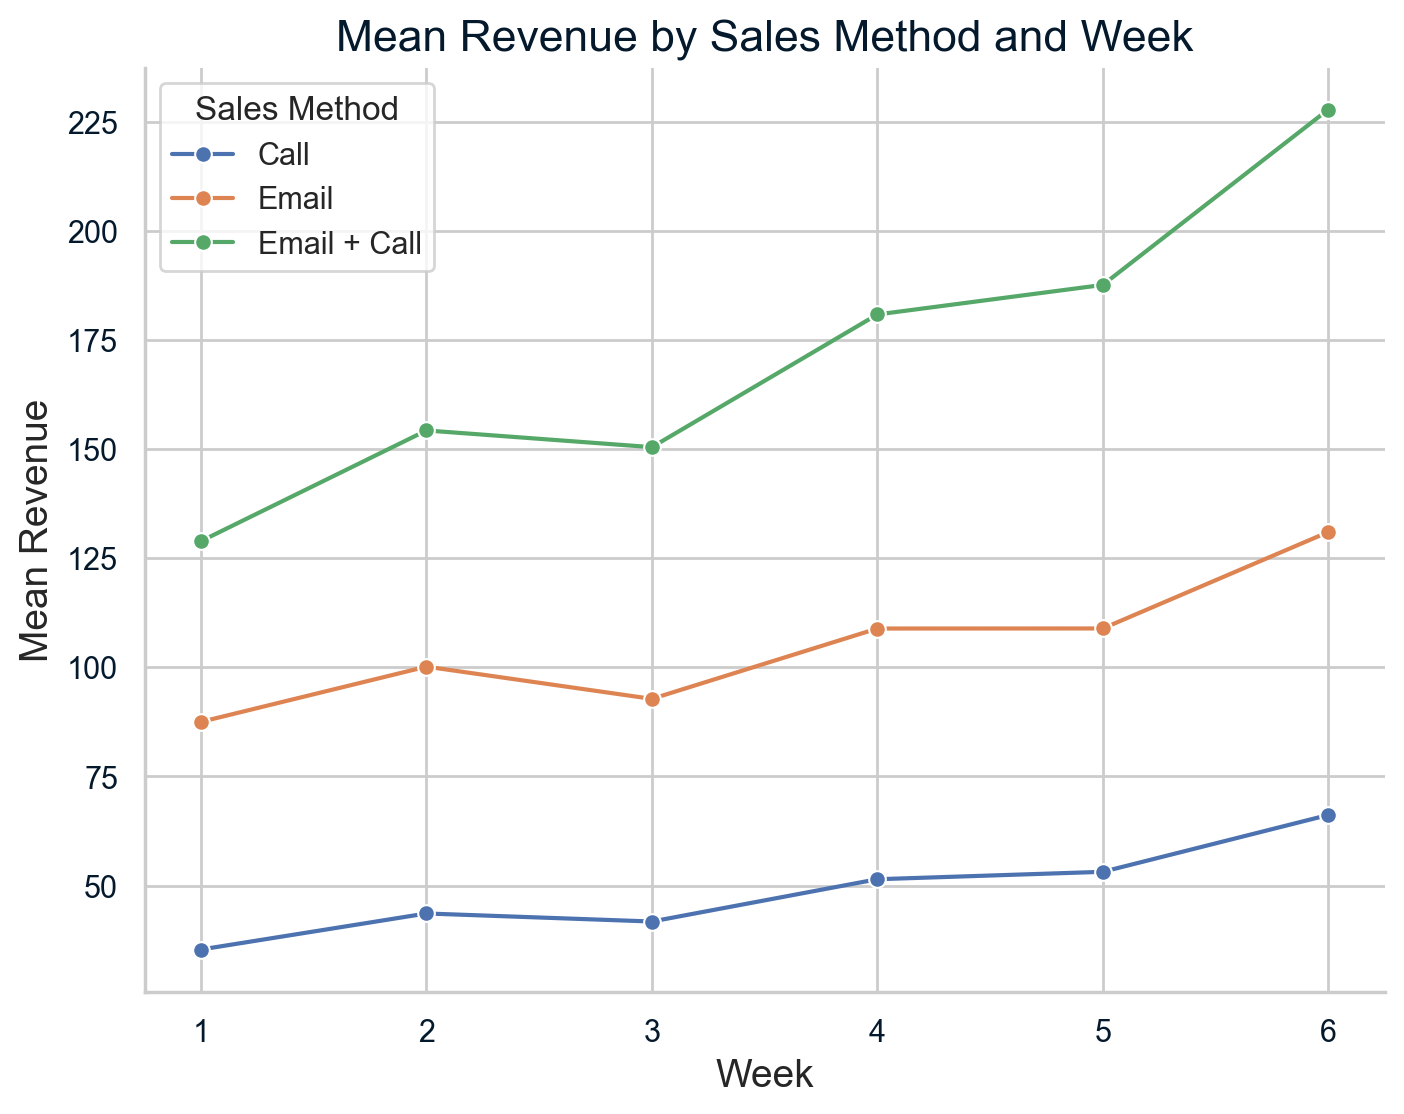

In [172]:
#Look for the average weekly revenue per Sales Method
avg_weekly_revenue = df_new.groupby(['week', 'sales_method'])['revenue'].mean().reset_index()
#Create the plot 
plt.figure(figsize=(8, 6))
sns.lineplot(data=avg_weekly_revenue, x='week', y='revenue', hue='sales_method', marker='o')
plt.title('Mean Revenue by Sales Method and Week', fontsize=16)
plt.xlabel('Week', fontsize=14)
plt.ylabel('Mean Revenue', fontsize=14)
plt.legend(title='Sales Method')

sns.despine() 
plt.show()

Analyzing the average weekly revenue for each sales method, it's evident that **Email + Call** consistently starts at the highest mean revenue, while the 'Call' method generates the lowest. This trend persists throughout the subsequent weeks, with all methods showing an upward trajectory over time, yet maintaining their relative positions. Overall, **Email + Call** consistently leads in generating the highest average revenue, followed by **Email** and **Call** respectively.

## 4. Based on the Data, which method would you recommend we continue to use?

In [173]:
df_new.groupby('sales_method')['revenue'].mean()

sales_method
Call             47.596866
Email            97.127671
Email + Call    183.651233
Name: revenue, dtype: float64

Based on the data and charts, it's clear that relying solely on phone calls yields the least favorable results, with minimal return on investment and significant time per customer interaction (about 30 minutes). A more effective approach is integrating emails for product insights, requiring less effort. Therefore, we recommend prioritizing the Email + Call strategy.

The Email + Call method consistently shows higher revenue trends compared to other methods. It's efficient, with calls averaging only 10 minutes, making it a strong choice over the inefficient Call-only approach. Our goal is to enhance product sales, and using the Email + Call method's recent performance as a benchmark shows promising results with minimal effort. Achieving increased new product sales over the next six months aligns with our sales objectives.

# Business Metric to Monitor

In [174]:
mean_revenue = df_new.groupby(['week', 'sales_method'])['revenue'].agg(['mean']).unstack()

styled_df = mean_revenue.style.highlight_max(axis=1, color='green').highlight_min(axis=1, color='darkred')
styled_df

In [175]:
median_revenue = df_new.groupby(['week', 'sales_method'])['revenue'].agg(['median']).unstack()

styled_df = median_revenue.style.highlight_max(axis=1, color='green').highlight_min(axis=1, color='darkred')
styled_df

In [176]:
#Grouping the data by 'week' and 'sales_method', then calculating 'mean' and 'median'
mean_med = df_new.groupby(['week', 'sales_method'])['revenue'].agg(['mean', 'median']).unstack()

styled_table = mean_med.style.background_gradient(cmap='viridis')
styled_table

Given the company's objective to increase revenue and profitability through higher product sales, we suggest prioritizing the average weekly revenue generated by each sales method as the key performance indicator.

This metric is advantageous because it allows for ongoing monitoring and weekly analysis. It enables prompt adjustments to strategies if sales performance deviates from expectations. From the insights provided in the highlighted pivot table, it is evident that the Email + Call strategy consistently achieves notably higher average revenue compared to other methods.

Upon examining the weekly average revenue data for each sales method, the Email + Call approach generally exhibits an upward trajectory, despite a minor decline between weeks 2 and 3, which was swiftly recovered in subsequent weeks. In contrast, the Email-only method lagged behind, reaching an average of approximately $130.97 per sale by week 6, significantly lower than the performance of the Email + Call approach.

The initial figures for this metric (Weekly Avg Revenue per Sales Method), focusing on the recommended Email + Call method, are $128.89, $154.24, $150.42, $180.82, $187.58, and $227.77 for weeks 1 through 6, respectively.

Continued tracking and analysis of average weekly revenue per sales method will provide valuable insights into ongoing trends and the effectiveness of these approaches over time.

# Final summary including recommendations that the business should undertake

Based on the analysis provided, we have several key recommendations to enhance business performance:

    1. The company should prioritize the Email + Call method. This strategy achieved the highest average revenue per sale at $183.65 and showed a consistent upward trend, with only a minor decline between weeks 2 and 3. Additionally, this method requires significantly less phone time—an average of just 10 minutes per customer—compared to the standalone 'Call' method.

    2. Given that the Email method also showed positive results, trending upwards over the six-week period, we suggest enhancing the impact of these communications. Integrating more targeted emails could potentially increase revenue with minimal additional effort.

    3. we recommend monitoring average weekly revenue by sales method. This metric is invaluable for ongoing trend analysis and future forecasting. Specifically, focus on the more successful Email and Email + Call methods. Over time, this focus could inform necessary strategic adjustments to align with revenue objectives.

    4. the Call method, which demonstrated comparatively poor results and required a substantial time commitment, should be deprioritized. This approach did not justify the effort involved, especially when contrasted with the more efficient methods.

    5. Improvements in data collection practices are also crucial. The dataset had 1074 missing values in the revenue column, which were addressed by removing affected rows to maintain data integrity. Moreover, some entries in the years as customer column were inconsistent with the company's history, displaying values such as 47 and 63 years, despite the company only being established for 40 years. These anomalies were also removed. Ensuring accurate data collection will be essential moving forward.

In the coming weeks, we recommend focusing on several strategic actions to boost sales:

    1. Monitoring Key Metrics: Regularly track key performance indicators to identify any promising signs of sales increases. This will help in making timely decisions and adjustments.

    2. Launching a Loyalty Campaign: Swiftly introduce a loyalty program that smartly promotes new products. Consider offering progressive discounts for customers based on their loyalty duration. Prioritize enhancing products that have historically high sales volumes and develop bundles of related products that cater to specific customer needs.

    3. Maintaining Awareness of Marketing Trends: Keep abreast of current commercialization and marketing strategies for existing products. This knowledge should inform the development and launch of new products, ensuring they are aligned with the latest market dynamics.

    4. Enhancing Data Collection for In-depth Analysis: Focus on improving the quality of data collected. Investigate how the frequency of site visits correlates with the number and type of products purchased. Additionally, gather data on product preferences—determine whether items like Pens, Printers, or Desk Chairs are more popular among consumers.

By implementing these steps, we can better understand consumer behavior, optimize our marketing strategies, and enhance product offerings, ultimately leading to increased sales and customer satisfaction.

In conclusion, adopting a multi-channel approach, particularly leveraging the Email + Call method, offers a higher return on time invested and could significantly boost operational efficiency and revenue generation. Additionally, we recommend that follow-up calls be made a day or two after sending product information emails. From my sales experience, delaying calls for a week often results in lower engagement and recall. Prompt follow-ups can leverage timing effectively, enhancing sales conversion rates. With focused efforts on these proven strategies, the team can excel and outperform the competition.